# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [3]:
!g++ -o binaries/tp_openmp_part_3_fib binaries/tp_openmp_part_3_fib.cpp -fopenmp -O3 -march=native
!g++ -o binaries/tp_openmp_part_3_fib_parallel binaries/tp_openmp_part_3_fib_parallel.cpp -fopenmp -O3 -march=native

### Performance evaluation

In [4]:
import os
import subprocess

try:
    os.remove("../fib_Stats.csv")
    f=open("../fib_Stats.csv","w+")
    f.write("version,N,runtime\n")
    f.close()
except OSError:
    pass

N = [4, 10, 15, 20]
repeats = range(0,10)

for nsteps in N:
        for repeat in repeats:
            args = ("binaries/tp_openmp_part_3_fib", "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("binaries/tp_openmp_part_3_fib_parallel", "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()




KeyboardInterrupt: 

### Performance analysis
#### Weak scaling

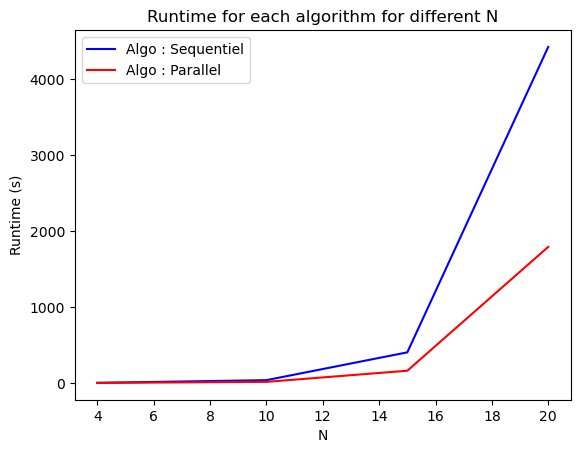

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../fib_Stats.csv',header=0,dtype={
                    'version': str,
                    'N': "int64",
                    'runtime' : "float64"
                 }
                 )
color_algo = {"Sequentiel" : "blue", "Parallel" : "red"}
algo_compare = ['Sequentiel', 'Parallel']


color_N = {4 : "blue", 10: "red", 15 : "green", 20 : "black", 24 : "orange"}

for algo in algo_compare:
    df_algo = df[df['version'] == algo]
    mean = df_algo.groupby(['N']).mean().reset_index()
    plt.plot(mean['N'], mean['runtime'], color=color_algo[algo], label="Algo : " + str(algo))
    
plt.legend()
plt.title("Runtime for each algorithm for different N")
plt.xlabel("N")
plt.ylabel("Runtime (s)")
#plt.yscale('log', base=2)
#plt.xscale('log', base=2)
plt.show()

On peut voir que pour les faibles valeurs de N (<15), il n'y a pas de différences flagrantes entre les temps d'execution du program séquentiel et parallèle. Cependant, à partir de N=15, on peut voir que le temps d'execution du program séquentiel augmente beaucoup plus que celui du program parallèle. Cela est dû au fait que le program séquentiel est plus lent que le program parallèle pour une même valeur de N (> 15). On peut donc conclure que le program parallèle est plus efficace que le program séquentiel.